<a href="https://colab.research.google.com/github/GECarlo/CodingDojo/blob/main/Classification_Metrics_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to predict if the client will subscribe (yes: 1 or no: 0) to a term deposit (the target column is called 'y_yes' in this csv).

 Your task is to build a logistic regression model to predict whether or not a client will subscribe. Tune the hyperparameters to get the best model possible. Then, calculate the following classification metrics:

Metrics to calculate:

Accuracy

Sensitivity

Specificity

AUC ROC

Additionally, plot the ROC.

Questions to think about and answer

After completing the task, answer the following questions:

Which metric is going to be best to evaluate your classification model for this dataset and why? 

Hint: think about what each metric means in this specific scenario. What metric is going to help the bank the most?

Compare your model's accuracy with the baseline model. Do you see any problems here?

What are other ways you could improve this model?

In [21]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML model
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [22]:
# load file
filename = '/content/drive/MyDrive/Colab Notebooks/bank_modified.csv'
df = pd.read_csv(filename)
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [23]:
# determine target y and features X
y = df['y_yes']
X = df.drop(columns = ['y_yes'])
X.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,1
4,59,0,226,1,-1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [26]:
# define a function that takes true and predicted values as arguments
# and prints all 4 metrics

def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=average)
  precision = precision_score(y_true, y_predicted, average=average)
  f1 = f1_score(y_true, y_predicted, average=average)

  print(f'Accuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}')

In [24]:
# split the train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# instantiate the scaler
scaler = StandardScaler()

# instantiate the model
logreg = LogisticRegression(C = 200)

# fit the training set
scaler.fit(X_train)

# transform the train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train the model on the data, storing the information learned from the data
# model is learning the relationship between x and y
logreg.fit(X_train, y_train)

# calculate AUC for train and test set
print(f'train AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])}')
print(f'test AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])}')

train AUC: 0.8615825927950176
test AUC: 0.8588628230616302


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


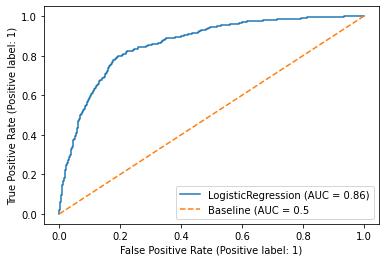

In [25]:
# visualize the ROC curve
plot_roc_curve(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5')
plt.legend();

In [27]:
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)

print('training scores')
print(classification_report(y_train, train_pred))

print('testing scores')
print(classification_report(y_test, test_pred));

training scores
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2994
           1       0.58      0.20      0.30       396

    accuracy                           0.89      3390
   macro avg       0.74      0.59      0.62      3390
weighted avg       0.86      0.89      0.87      3390

testing scores
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      1006
           1       0.59      0.27      0.37       125

    accuracy                           0.90      1131
   macro avg       0.75      0.62      0.66      1131
weighted avg       0.88      0.90      0.88      1131



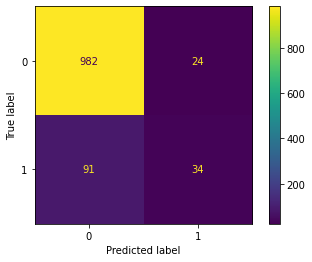

In [28]:
# create confusion matrics
ConfusionMatrixDisplay.from_predictions(y_test, test_pred);

sensitivity = tp / (tp + fn)

34 / (34 + 91)

34 / 125

0.272


specificity = tn / (tn + fp)

982 / (982 + 24)

982 / 1006

0.976
